# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [317]:
# Importa las librerias <3
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


In [250]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/Capitulo_3/"
MEDICAMENTOS = "drug200.csv"

def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

df = extraer_datos(DOWNLOAD_ROOT, MEDICAMENTOS)
print(df.head())


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [251]:
# Visualiza el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [252]:
# Obten información de los datos.
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

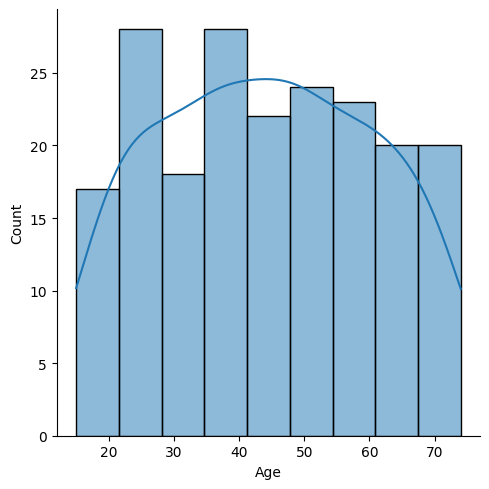

In [253]:

#Gráfica la variable
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize = (9,5))

#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age,kde=True)


In [254]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

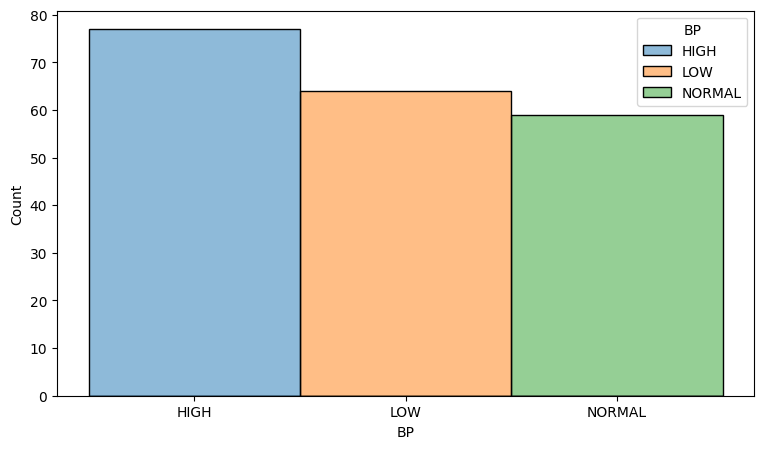

In [255]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="BP",hue="BP")

<Axes: xlabel='Cholesterol', ylabel='Count'>

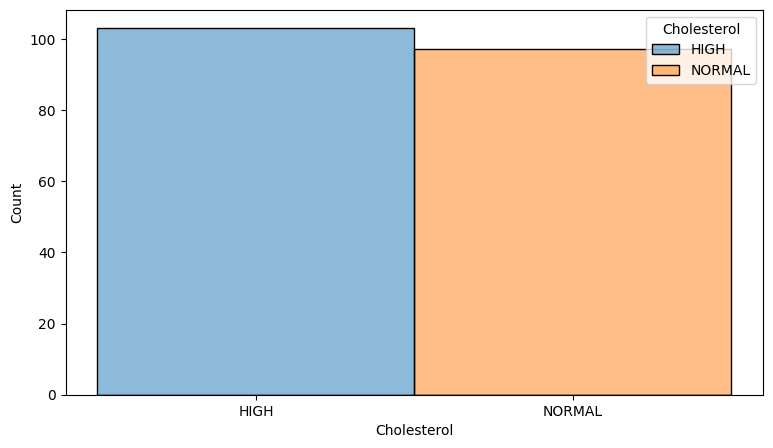

In [256]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Cholesterol",hue="Cholesterol")

<Figure size 900x500 with 0 Axes>

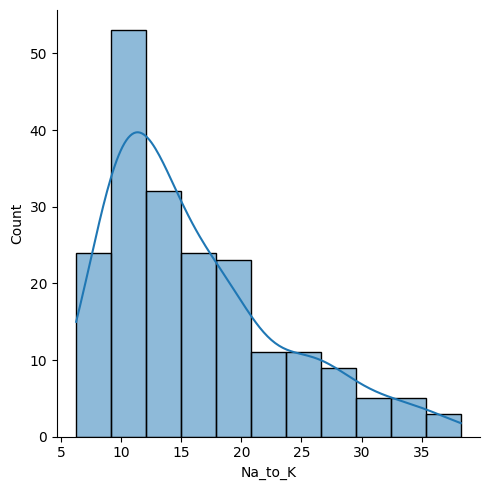

In [257]:
# Crea un displot para Sodio Potasio
plt.figure(figsize = (9,5))
sns.displot(df.Na_to_K,kde=True)

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

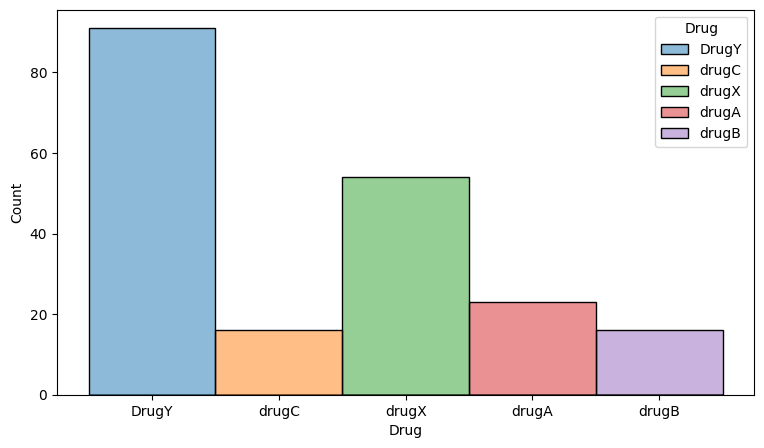

In [258]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Drug",hue="Drug")

#Cuenta los medicamentos
df.Drug.value_counts()


***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


C:\Users\Mimos\AppData\Local\Temp\ipykernel_21964\3291894569.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc='upper left')  # coloca la leyenda fuera del gráfico


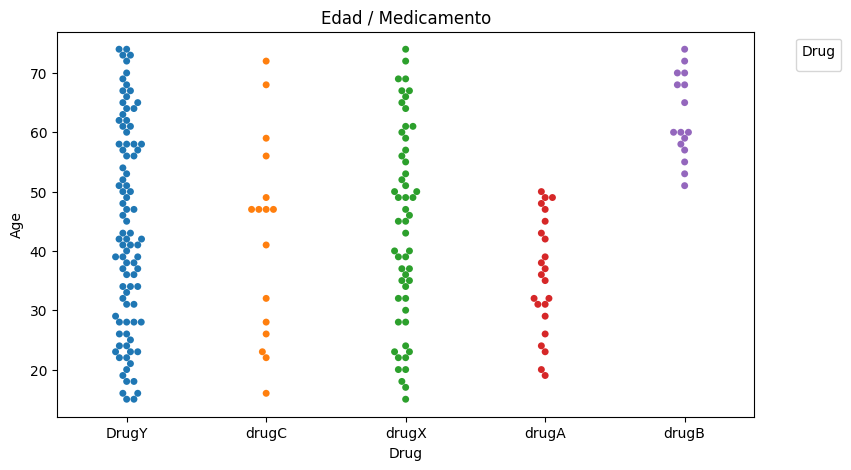

In [259]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Age", data=df, hue="Drug", dodge=False)  # dodge=False para que los puntos no se separen por hue

plt.title("Edad / Medicamento")
plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc='upper left')  # coloca la leyenda fuera del gráfico

plt.show()



    Drug Sex  Count
0  DrugY   F     47
1  DrugY   M     44
2  drugA   F      9
3  drugA   M     14
4  drugB   F      6
5  drugB   M     10
6  drugC   F      7
7  drugC   M      9
8  drugX   F     27
9  drugX   M     27


Text(0.5, 1.0, 'Género/Medicamento')

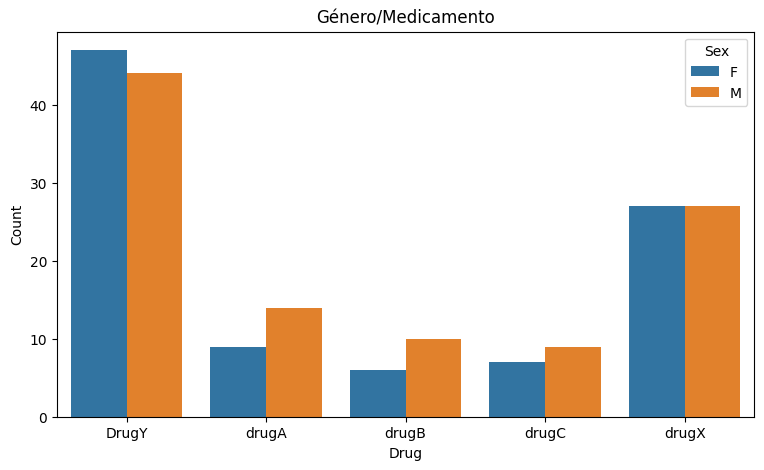

In [260]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
print(df_Sex_Drug)
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Género/Medicamento")


    Drug      BP  Count
0  DrugY    HIGH     38
1  DrugY     LOW     30
2  DrugY  NORMAL     23
3  drugA    HIGH     23
4  drugB    HIGH     16
5  drugC     LOW     16
6  drugX     LOW     18
7  drugX  NORMAL     36


Text(0.5, 1.0, 'Presión Sanguinea/Medicamentos')

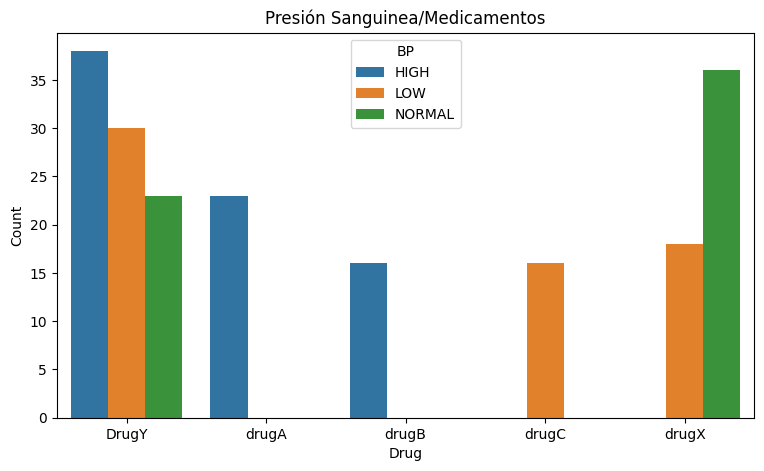

In [261]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
print(df_BP_Drug)

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("Presión Sanguinea/Medicamentos")


    Drug Cholesterol  Count
0  DrugY        HIGH     47
1  DrugY      NORMAL     44
2  drugA        HIGH     12
3  drugA      NORMAL     11
4  drugB        HIGH      8
5  drugB      NORMAL      8
6  drugC        HIGH     16
7  drugX        HIGH     20
8  drugX      NORMAL     34


Text(0.5, 1.0, 'Cholesterol -- Drug')

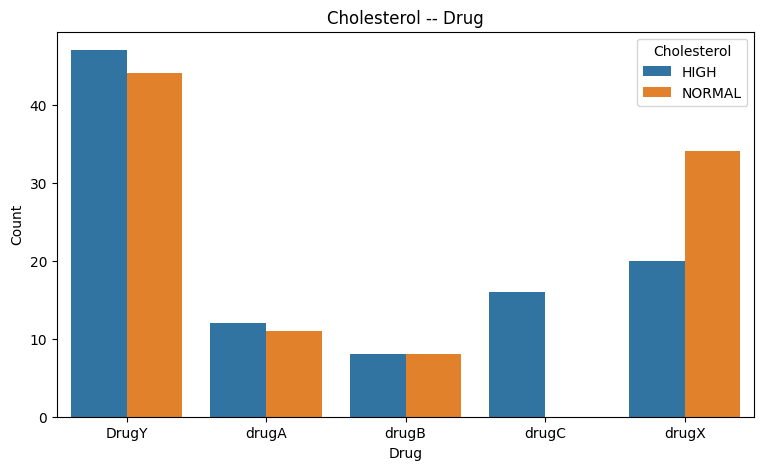

In [262]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
print(df_CH_Drug)

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")



C:\Users\Mimos\AppData\Local\Temp\ipykernel_21964\3395157938.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc='upper left')


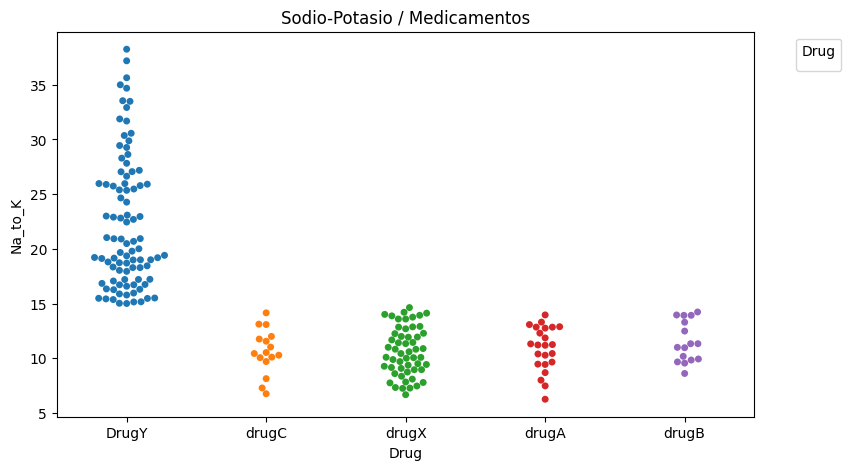

In [263]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Na_to_K", data=df, hue="Drug", dodge=False)

plt.title("Sodio-Potasio / Medicamentos")
plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [264]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]
for l in variables:
    label_encoder(l)
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [265]:
# Crear set de entrenamiento y set de prueba
x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [296]:
## Crear modelo para medicamento
y_train_y = (y_train == 0)
y_test_y = (y_test == 0)


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [297]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train, y_train_y)

SGDClassifier(random_state=42)

In [299]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([[47,1,1,0,8]])

c:\Users\Mimos\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [311]:
# Realiza una Cross validation/K-Folds
y_train_pred = cross_val_predict(sgd,x_train,y_train_y,cv=3)
print(y_train_pred)



[ True False False  True  True  True  True  True  True  True False  True
 False  True False  True False  True  True  True  True  True False  True
 False  True  True  True  True False False False  True  True  True  True
  True False  True False False  True  True False False  True False False
  True False  True  True  True  True  True  True  True  True False  True
  True False False False  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True False  True  True False  True  True  True  True
 False False  True  True  True  True  True  True  True  True False False
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True  True False False  True  True  True False  True  True
  True  True  True  True False  True  True False  True  True False  True
 False False  True False  True  True  True  True  True  True  True  True
  True  True  True  True]


 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [301]:
# Modelo que nunca es Y
cross_val_score(sgd,x_train,y_train_y,cv=3,scoring="accuracy") 

array([0.7962963 , 0.73584906, 0.71698113])

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [312]:
# Matriz de confusión

confusion_matrix(y_train_y,y_train_pred)


array([[44, 40],
       [ 0, 76]])

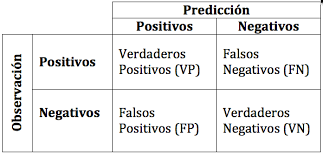

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [313]:
#Importar precision_score y recall_score 
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r

(0.6551724137931034, 1.0)

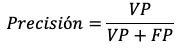

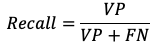

In [315]:
#Cambiar de clasificador
#Importar RandomForestClassifier

#Hacer la matriz de confusión otra vez
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train_y)
y_train_pred = cross_val_predict(rfc,x_train,y_train_y,cv=3)
confusion_matrix(y_train_y,y_train_pred)


array([[84,  0],
       [ 2, 74]])

In [316]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r


(1.0, 0.9736842105263158)

In [319]:
#Calcular F1
f1 = f1_score(y_train_y, y_train_pred)
print("F1 score:", f1)

F1 score: 0.9866666666666667


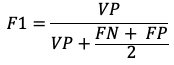

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [276]:
#Puntación de un paciente aleatorio


In [277]:
#Graficar la precisión y recall 

#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si


El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [278]:
#Supon que ya lo pensaste y querías un umbral  90 


In [279]:
#Arroja la precisión y recall para un umbral de 90


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [280]:
#Importar roc_curve


In [281]:
#Graficar la curva ROC

#Poner una cuadrícula


Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [282]:
#Calcular el puntaje de la curva


In [283]:
#Compararlo con el modelo de random forest


In [284]:
#Graficar la curva ROC y la predicción de random forest 


In [285]:
#Calcular el puntaje (área bajo la curva) de random forest  


***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [286]:
# Importar SVC=Support Vector Classifier



#Predecir a un humano aleatorio para ver que todo este funcionando bien 


In [287]:
#Utilizar decision_function para observar los puntajes de cada medicina 

#Decidirá por el qué tenga mayor puntaje

In [288]:
#Ahora, utiliza el clasificador multiclase 

#Predecir a un humano ahora con este clasificador


In [289]:
#Utilizar decision_function para observar los puntajes de cada medicina 


In [290]:
#campararlo con los datos obtenidos de sgd.fit 


***

## <span style="color:green">8. Analizar Errores</span>

In [291]:
#Hacer un clasificador de random forest


In [292]:
#Utilizar la matriz de confusión 


In [293]:
#utilizar ahora SGD
